In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200)


In [2]:
df = pd.read_csv('../input/stress-analysis-in-social-media/dreaddit-test.csv')

In [3]:
df.head(5)


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [4]:
df.columns

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [5]:
df.dtypes
      

id                            int64
subreddit                    object
post_id                      object
sentence_range               object
text                         object
                             ...   
lex_dal_avg_pleasantness    float64
social_upvote_ratio         float64
social_num_comments           int64
syntax_fk_grade             float64
sentiment                   float64
Length: 116, dtype: object

In [6]:
df.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [7]:
df.loc[df.duplicated()]

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment


In [8]:
df['sentiment'].value_counts()

sentiment
 0.000000    21
 0.150000     6
-0.133333     5
-0.100000     5
-0.033333     4
             ..
 0.356944     1
 0.296429     1
 0.059339     1
 0.433333     1
 0.136364     1
Name: count, Length: 602, dtype: int64

Text(0, 0.5, 'text')

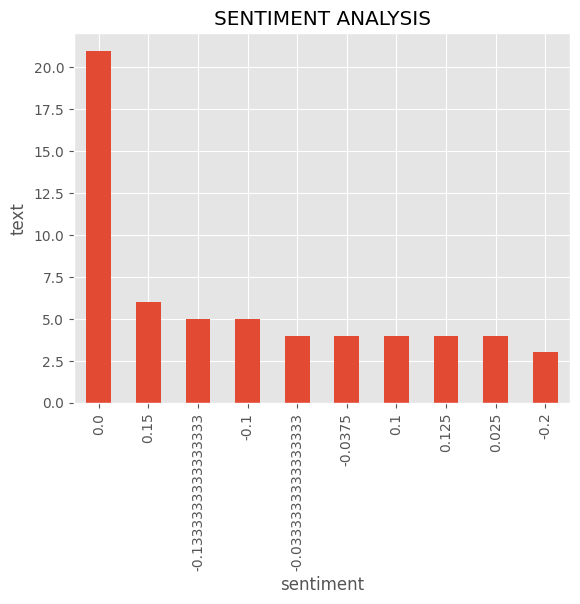

In [9]:
ax = df['sentiment'].value_counts() \
.head(10) \
.plot(kind='bar',title='SENTIMENT ANALYSIS') 
ax.set_xlabel('sentiment')
ax.set_ylabel('text')


Text(0.5, 0, 'confidence')

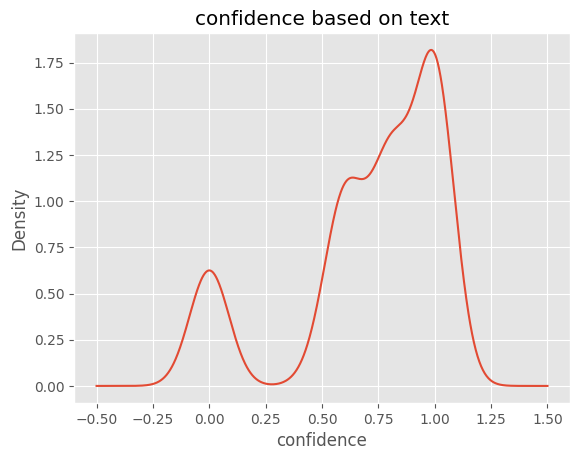

In [10]:
ax = df['confidence'].plot(kind='kde',
                          title ='confidence based on text')
ax.set_xlabel('confidence')

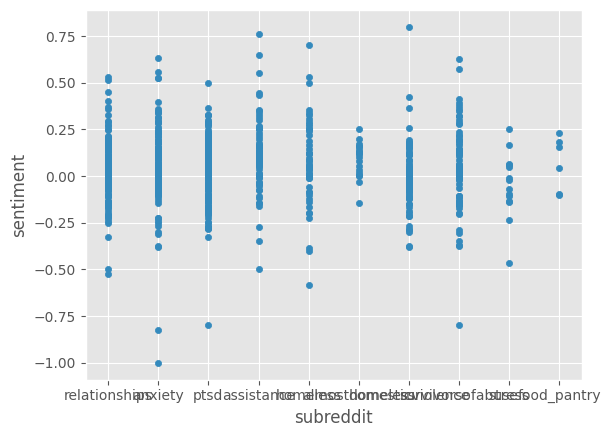

In [11]:
df.plot(kind='scatter', x='subreddit',y='sentiment')
title='sentiment vs genre'

<Axes: xlabel='sentiment', ylabel='subreddit'>

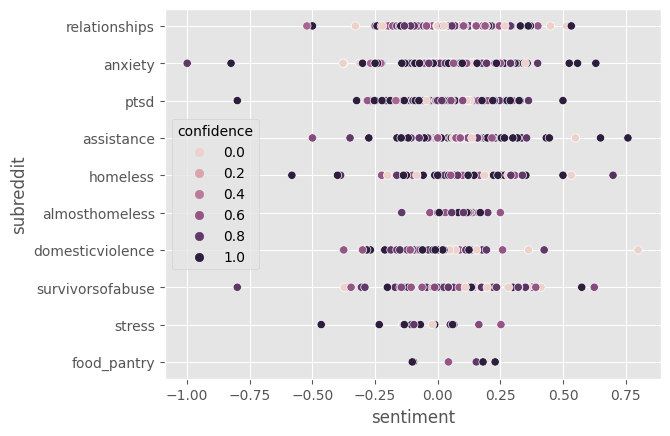

In [12]:
sns.scatterplot(x='sentiment',
               y='subreddit',
               hue='confidence',
               data=df)

In [13]:
df['subreddit'].value_counts()

subreddit
anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: count, dtype: int64

In [14]:
df.query('subreddit !="almosthomeless"') \
.groupby('subreddit')['sentiment']  \
.agg(['mean','count'])  \



,mean,count
subreddit,,
anxiety,0.047313,147
assistance,0.106162,66
domesticviolence,-0.002058,72
food_pantry,0.068193,6
homeless,0.070890,52
ptsd,0.027924,127
relationships,0.047419,142
stress,-0.048825,14
survivorsofabuse,0.046048,70


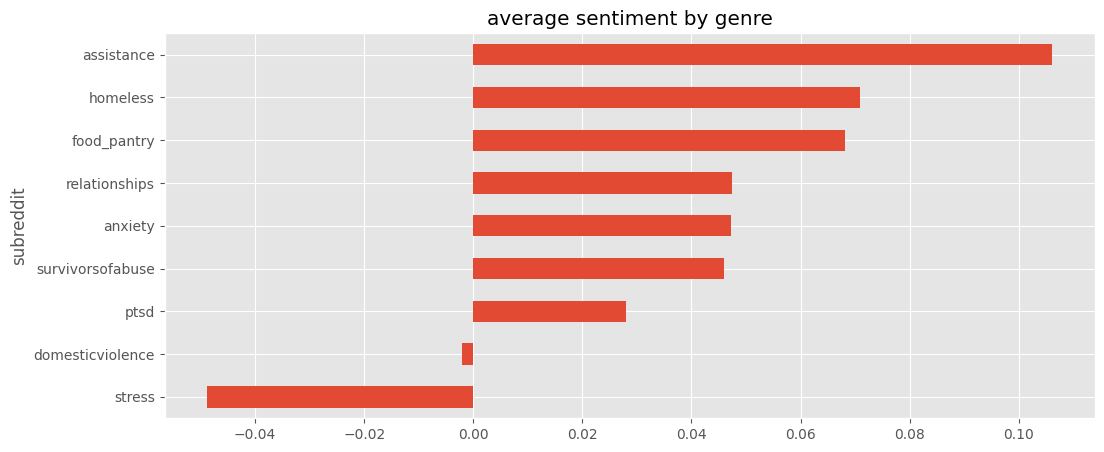

In [15]:
ax = df.query('subreddit !="almosthomeless"') \
.groupby('subreddit')['sentiment']  \
.agg(['mean','count'])  \
.query('count >=5') \
.sort_values('mean')['mean'] \
.plot(kind='barh', figsize=(12,5), title= 'average sentiment by genre')